In [1]:
#파싱(SeqIO, NCBIXML, Entrez), 유전체 서열 다루기, 웹 정보 가져오기(Entrez), 생물정보학 툴 사용하기(BLAST)

In [2]:
#생물정보학 파일 포맷 : FASTA/FASTQ, SAM/BAM, BED, VCF, GenBank, XML, JSON

# Q = FastQ의 네번째 줄의 ASCII 값 - 33
# Q =10log(P)

# SAM flag, CIGAR 문자열(M, I, D) : 리드가 정렬된 상태를 설명한다.

#VCF : 변이를 표기하기 위해 만든 포맷으로 메타데이터와 내용부분으로 나눈다. 내용 부분은 8개의 필수 열과 샘플에 따라 추가되는 열로 이루어진다.

#데이터 교환시 사용하는 XML, JSON
#XML : <태그>내용</태그>, 데이터를 구조화하여 표현하는데 주로 사용
#JSON : 딕셔너리 형태

In [3]:
#method : transcribe(), translate(), complement(), reverse_complement()

#첫 번째 종결코돈에서 변역 종료하기
from Bio.Seq import Seq
mRNA = Seq('AUGAACUAAGUUUAGAAU')
ptn = mRNA.translate(to_stop = True)
print(ptn)

MN


In [4]:
#종결코돈 기준으로 서열 나누기
from Bio.Seq import Seq
mRNA = Seq('AUGAACUAAGUUUAGAAU')
ptn = mRNA.translate()
for seq in ptn.split("*"):
    print(seq)

MN
V
N


In [5]:
#코돈 테이블 출력
from Bio.Data import CodonTable
codon_table = CodonTable.unambiguous_dna_by_name['Standard']   #Standard 대신 Vertebrate Mitochondrial
print(codon_table)

Table 1 Standard, SGC0

  |  T      |  C      |  A      |  G      |
--+---------+---------+---------+---------+--
T | TTT F   | TCT S   | TAT Y   | TGT C   | T
T | TTC F   | TCC S   | TAC Y   | TGC C   | C
T | TTA L   | TCA S   | TAA Stop| TGA Stop| A
T | TTG L(s)| TCG S   | TAG Stop| TGG W   | G
--+---------+---------+---------+---------+--
C | CTT L   | CCT P   | CAT H   | CGT R   | T
C | CTC L   | CCC P   | CAC H   | CGC R   | C
C | CTA L   | CCA P   | CAA Q   | CGA R   | A
C | CTG L(s)| CCG P   | CAG Q   | CGG R   | G
--+---------+---------+---------+---------+--
A | ATT I   | ACT T   | AAT N   | AGT S   | T
A | ATC I   | ACC T   | AAC N   | AGC S   | C
A | ATA I   | ACA T   | AAA K   | AGA R   | A
A | ATG M(s)| ACG T   | AAG K   | AGG R   | G
--+---------+---------+---------+---------+--
G | GTT V   | GCT A   | GAT D   | GGT G   | T
G | GTC V   | GCC A   | GAC D   | GGC G   | C
G | GTA V   | GCA A   | GAA E   | GGA G   | A
G | GTG V   | GCG A   | GAG E   | GGG G   | G
--+---------

### Bio.SeqUtils 모듈

In [6]:
#GC-contents(%) 계산하기
from Bio.Seq import Seq
from Bio.SeqUtils import GC
exon_seq = Seq("ATGCAGTAG")
print(GC(exon_seq))

44.44444444444444


In [7]:
#가능한 모든 번역 구하기
from Bio.Seq import Seq
from Bio.SeqUtils import six_frame_translations
seq1 = Seq("ATGCCTTGAAATGTATAG")
print(six_frame_translations(seq1))

GC_Frame: a:6 t:6 g:4 c:2 
Sequence: atgccttgaaatgtatag, 18 nt, 33.33 %GC


1/1
  A  L  K  C  I
 C  L  E  M  Y
M  P  *  N  V  *
atgccttgaaatgtatag   33 %
tacggaactttacatatc
G  Q  F  T  Y 
 H  R  S  I  Y  L
  A  K  F  H  I




In [8]:
#Tm(이중나선의 절반이 단일 나선이 될 때의 온도) 계산
from Bio.SeqUtils import MeltingTemp as mt
from Bio.Seq import Seq
myseq = Seq("AGTCTGGGACGGCGCGGCAATCGCA")
print(mt.Tm_Wallace(myseq))

84.0


In [9]:
#아미노선 서열 기호 <-> 약자
from Bio.SeqUtils import seq1
essential_amino_acid_3 = "LeuLysMetValIleThrTrpPhe"
print(seq1(essential_amino_acid_3))

from Bio.SeqUtils import seq3
essential_amino_acid_3 = "LKMVITWF"
print(seq3(essential_amino_acid_3))

LKMVITWF
LeuLysMetValIleThrTrpPhe


### SeqRecord : Seq 객체에 추가적인 정보를 넣을 수 있는 객체

In [10]:
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord

seq = Seq("ACGT")
seqRecord = SeqRecord(seq)

In [11]:
seqRecord.id = 'NC_1111'
seqRecord.name = 'GeneA'
seqRecord.description = 'This is a description.'
seqRecord.annotations['Annotation_Key1'] = 'Annotation_Value1'
seqRecord.annotations['Annotation_Key2'] = 'Annotation_Value2'
print(seqRecord)

ID: NC_1111
Name: GeneA
Description: This is a description.
Number of features: 0
/Annotation_Key1=Annotation_Value1
/Annotation_Key2=Annotation_Value2
Seq('ACGT')


In [12]:
#FASTA 파일로부터 SeqRecord 객체 만들기
#from Bio import SeqIO
#record = SeqIO.read('J01636.1.fasta', 'fasta')

#FASTA 파일로부터 GenBank 객체 만들기
#from Bio import SeqIO
#record = SeqIO.read('J01636.1.gbk', 'genbank')

### FASTA, FASTQ, GenBank 파일 읽기
- SeqIO.read() : 파일 내부에 있는 단일 레코드를 읽을 수 있다.
- SeqIO.parse() : 파일 내부에 있는 복수의 레코드를 읽을 수 있다.

In [13]:
#압축된 FASTQ 파일 읽기
# import gzip
# from Bio import SeqIO

# handle = gzip.open('sample_1.fastq.gz', 'rt')
# seq = SeqIO.parse(handle, 'fastq')
# for s in seq:
#     print(s.seq)
    
# with gzip.open('sample_1.fastq.gz', 'rt') as handle:
#     seq = SeqIO.parse(handle, 'fastq')
#     for s in seq:
#         print(s.seq)

In [14]:
#Entrez 모듈로 NCBI 정보를 가져와 SeqIO로 읽기
from Bio import Entrez
from Bio import SeqIO
Entrez.email = 'id@naver.com'
with Entrez.efetch(db='nucleotide', rettype='fasta', retmode='text', id='42540826') as handle:
    seq = SeqIO.read(handle, 'fasta')
print(seq)

ID: AY463215.1
Name: AY463215.1
Description: AY463215.1 Homo sapiens CCR5 chemokine receptor (CCR5) gene, complete cds
Number of features: 0
Seq('ATGGATTATCAAGTGTCAAGTCCAATCTATGACATCAATTATTATACATCGGAG...TGA')


### Multiple Sequence Alignment 다루기

In [15]:
#AlignIO.read() 메서드로 Multiple Sequence Alignment 파일을 읽을 수 있다.
from Bio import AlignIO
alignment = AlignIO.read('./Downloads/biopython_data/example.aln', 'clustal')
print(alignment)

Alignment with 3 rows and 142 columns
MVLSPADKTNVKAAWGKVGAHAGEYGAEALERMFLSFPTTKTYF...KYR sp|P69905|HBA_HUMAN
MVLSPADKTNVKAAWGKVGAHAGEYGAEALERMFLSFPTTKTYF...KYR sp|P69907|HBA_PANTR
MVLSGEDKSNIKAAWGKIGGHGAEYGAEALERMFASFPTTKTYF...KYR sp|P01942|HBA_MOUSE


In [16]:
# #MUSCLE 툴로 Multiple Sequence Alignment 수행
# from Bio.Align.Applications import MuscleCommandline
# muscle_exe = './Downloads/biopython_data/muscle3.8.31_macppc'
# cmd_line = MuscleCommandline(muscle_exe, input='HBA.all.fasta', out='HBA.aln', clw=' ')
# print(cmd_line)

# #프로세스가 shell로부터 stdin, stdout, stderr을 상속받는다
# #stdin : 받은 입력 값을 프로그램에 나타내주는 stream
# #stdout : 모든 출력값들이 가는 곳
# #stderr : 또 다른 출력 채널, 주로 디버깅 정보를 출력하거나 에러를 출력하는데에 쓰인다.
# stdout, stderr = cmd_line()

In [17]:
#WebLogo로 보존 서열 시각화
from Bio.motifs import Motif
from Bio import motifs
from Bio.Seq import Seq

instances = [Seq("TACAA"),
            Seq("TACGC"),
            Seq("TACAC"),
            Seq("TACCC"),
            Seq("AACCC"),
            Seq("AATGC"),
            Seq("AATGC"),]
m = motifs.create(instances)  #Motif 객체 만들기
Motif.weblogo(m, 'test.png')

from IPython.display import Image
Image('test.png')

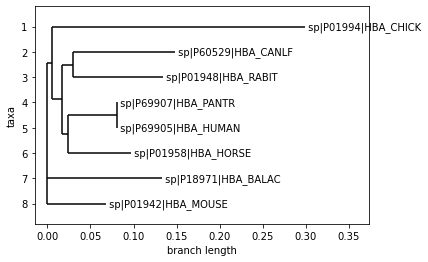

Tree(rooted=False, weight=1.0)
    Clade()
        Clade(branch_length=0.00537)
            Clade(branch_length=0.29387, name='sp|P01994|HBA_CHICK')
            Clade(branch_length=0.01203)
                Clade(branch_length=0.01282)
                    Clade(branch_length=0.1181, name='sp|P60529|HBA_CANLF')
                    Clade(branch_length=0.10357, name='sp|P01948|HBA_RABIT')
                Clade(branch_length=0.00617)
                    Clade(branch_length=0.05673)
                        Clade(branch_length=0.0, name='sp|P69907|HBA_PANTR')
                        Clade(branch_length=0.0, name='sp|P69905|HBA_HUMAN')
                    Clade(branch_length=0.07405, name='sp|P01958|HBA_HORSE')
        Clade(branch_length=0.13313, name='sp|P18971|HBA_BALAC')
        Clade(branch_length=0.06808, name='sp|P01942|HBA_MOUSE')


In [18]:
#계통수로 종 간 유전적 유사도 시각화
#Newic 포맷 : 변과 변의 길이를 나타낼 수 있는 형태
from Bio import Phylo
tree = Phylo.read('./Downloads/biopython_data/HBA.newick', 'newick')

Phylo.draw(tree)
print(tree)

### BLAST(Basic Local Alignment Search Tool)
- DNA, RNA, 아미노산 서열을 입력하면 데이터베이스에서 유사한 것을 찾아주는 알고리즘
- NCBIWWW 모듈 사용
- NCBIXML로 결과 XML 파일 파싱

In [19]:
#유전성 질환을 앓고 있는 환자의 유전체에서 인간 유전체에 정렬되지 않는 서열들이 발견되었다.
#이 서열들을 BLAST에 넣어 어떤 종에서 유래한 것인지 알 수 있다.
from Bio.Blast import NCBIWWW
from Bio import SeqIO
record = SeqIO.read('./Downloads/biopython_data/buccal_swab.unmapped1.fasta', format='fasta')
result_handle = NCBIWWW.qblast('blastn', 'nt', record.format('fasta'))

with open('blast_result.xml', 'w') as out_handle:
    out_handle.write(result_handle.read())
result_handle.close()

#NCBIWWW.qblast() 메서드로 BLAST를 실행하면 XML 포맷이 나온다.
from Bio.Blast import NCBIXML
result_handle = open('blast_result.xml')
blast_records = NCBIXML.parse(result_handle)
for blast_record in blast_records:
    for alignment in blast_record.alignments:
        for hsp in alignment.hsps:
            print(alignment.title)
            print(alignment.length)
            print(hsp.expect)
            print(hsp.query)
            print(hsp.match)
            print(hsp.sbjct)
            
result_handle.close()

gi|1776204818|gb|CP045931.1| Streptococcus pneumoniae strain AUSMDU00010538 chromosome, complete genome
2090792
2.98846e-35
CTTTTGTTAATCGATGATATACAGTCACTCAGCGGAAAAAAAGTCGCAACTCAGGAAGAATTTTTCAATACCTTTAACGCCCTTCATG
||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
CTTTTGTTAATCGATGATATACAGTCACTCAGCGGAAAAAAAGTCGCAACTCAGGAAGAATTTTTCAATACCTTTAACGCCCTTCATG
gi|1601506830|emb|LR536837.1| Streptococcus pneumoniae strain 2245STDY6106635 genome assembly, chromosome: 1
2126260
2.98846e-35
CTTTTGTTAATCGATGATATACAGTCACTCAGCGGAAAAAAAGTCGCAACTCAGGAAGAATTTTTCAATACCTTTAACGCCCTTCATG
||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
CTTTTGTTAATCGATGATATACAGTCACTCAGCGGAAAAAAAGTCGCAACTCAGGAAGAATTTTTCAATACCTTTAACGCCCTTCATG
gi|1601504866|emb|LR536835.1| Streptococcus pneumoniae strain 2245STDY6020240 genome assembly, chromosome: 1
1986889
2.98846e-35
CTTTTGTTAATCGATGATATACAGTCACTCAGCGGAAAAAAAGTCGCAACTCAGGAAGAATTTTTCAATACCTTTAACGCCCTT

### Entrez

In [20]:
# from Bio import Entrez
# Entrez.email = 'id@naver.com'
# handle = Entrez.efetch(db = 'nucleotide', id='NC_002058.3', rettype='gb', retmode='text')
# #Entrez의 질의 결과는 XML 형태로, Entrez.read(), Entrez.parse() 메서드를 통해 파싱
# #NC_002058.3에 대해 출판된 논문에 대한 제목들
# records = Entrez.parse(handle)  #dict형태
# for record in records:                      #TypeError: file should be opened in binary mode
#     for journal in record['GBSeq_reference']:
#         print(journal['GBReference_title'])

In [21]:
from Bio import Entrez
Entrez.email = 'id@naver.com'
handle = Entrez.esearch(db='pubmed', term='metagenome')
record = Entrez.read(handle)
print(record['Count'])

11783


### 단백질 데이터베이스 Swiss-Prot

In [22]:
from Bio import SwissProt
handle = open('./Downloads/biopython_data/P02649.txt')
record = SwissProt.read(handle)
handle.close()
print(record.gene_name)
print(record.organism)
print(record.sequence_length)
print(record.sequence)

Name=APOE;
Homo sapiens (Human).
317
MKVLWAALLVTFLAGCQAKVEQAVETEPEPELRQQTEWQSGQRWELALGRFWDYLRWVQTLSEQVQEELLSSQVTQELRALMDETMKELKAYKSELEEQLTPVAEETRARLSKELQAAQARLGADMEDVCGRLVQYRGEVQAMLGQSTEELRVRLASHLRKLRKRLLRDADDLQKRLAVYQAGAREGAERGLSAIRERLGPLVEQGRVRAATVGSLAGQPLQERAQAWGERLRARMEEMGSRTRDRLDEVKEQVAEVRAKLEEQAQQIRLQAEAFQARLKSWFEPLVEDMQRQWAGLVEKVQAAVGTSAAPVPSDNH


### 시스템생물학 지도 : KEGG
- 생물학적 대사 경로와 기능적 유전자 모듈이 담겨 있는 데이터베이스
- 유전체와 유전자 정보가 담겨 있는 데이터베이스
- 화학물질과 효소 정보가 담겨 있는 데이터베이스
- 질병, 약물, 환경정보가 담겨 있는 데이터베이스

In [23]:
#효소 파일을 다뤄보자
from Bio.KEGG import Enzyme
records = Enzyme.parse(open('./Downloads/biopython_data/ec_2.7.1.40.txt'))
record = list(records)[0]
print('classname:', record.classname)
print('sysname:', record.sysname) 
print('subtrate:', record.substrate) 
print('product:', record.product) 

classname: ['Transferases;', 'Transferring phosphorus-containing groups;', 'Phosphotransferases with an alcohol group as acceptor']
sysname: ['ATP:pyruvate 2-O-phosphotransferase']
subtrate: ['ATP [CPD:C00002]', 'pyruvate [CPD:C00022]']
product: ['ADP [CPD:C00008]', 'phosphoenolpyruvate [CPD:C00074]']


In [24]:
#인간 대사 경로들 중 인슐린과 관련 있는 대사 경로를 뽑아오고, KEGG 대사 경로에서 유전자만 가져오기
#REST 모듈 : KEGG의 데이터베이스 목록을 읽어오고 데이터를 가져올 수 있다.
from Bio.KEGG import REST
human_pathways = REST.kegg_list('pathway', 'hsa').read()

insulin_pathways = []
for line in human_pathways.rstrip().split('\n'):
    entry, description = line.split('\t')
    if 'insulin' in description.lower():
        insulin_pathways.append(entry)
        print(entry, description)
print(insulin_pathways)

insulin_genes = []
for pathway in insulin_pathways:
    pathway_file = REST.kegg_get(pathway).read()
    current_section = None
    for line in pathway_file.rstrip().split('\n'):
        section = line[:12].strip()
        if not section == '':
            current_section = section
            if current_section == "GENE":
                gene_identifiers, gene_description = line[12:].split('; ')
                gene_id, gene_symbol = gene_identifiers.split()
                if not gene_symbol in insulin_genes:
                    insulin_genes.append(gene_symbol)
print(', '.join(insulin_genes))

path:hsa04910 Insulin signaling pathway - Homo sapiens (human)
path:hsa04911 Insulin secretion - Homo sapiens (human)
path:hsa04931 Insulin resistance - Homo sapiens (human)
['path:hsa04910', 'path:hsa04911', 'path:hsa04931']
INS, SLC2A1
